In [1]:
import numpy as np
import matplotlib.pylab as plt 
import pandas as pd
import scipy
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
%matplotlib inline  
from pylab import rcParams
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

<img src="wrk8_1.png">

# 1) No, the becasue they are not unit vectors

<img src="FullSizeRender.JPG">

<img src="wrk8_2.png">

<img src="wrk8_3.png">

# 3a
#pX2
#2Xp
#pXp
#pXP

# 3B
#first and the third reduce dimensionality
#the 2nd and the fourth both reduce the dimensionality subspace, but project back in to the original space

<img src="wrk8_4.png">

In [2]:
#Read in Data
features=[i for i in range(1,86)]
classes=pd.read_fwf('classes.txt', colspecs='infer', widths=None,names=['id','animal']).values
matrix=pd.read_fwf('predicate-matrix-continuous.txt', names=features).values

In [3]:
#Fit and Cluster Data Using 10 Subgroups

pca = PCA(n_components=2)
pca.fit(matrix)
pca_transform = pca.transform(matrix)

In [4]:
pca_transform

array([[ -14.33200256, -106.35992505],
       [  58.9630861 ,   76.22681969],
       [-170.08767172,  139.3662367 ],
       [ -31.85582565,   54.04638157],
       [  29.65753503,   11.3917049 ],
       [  40.87859041,   10.72272289],
       [  -1.17791115, -104.79228138],
       [  82.43016284,   45.38757524],
       [-211.92608739,   82.83737143],
       [  90.92835147,   43.3052917 ],
       [  58.01597662,  -35.20297112],
       [  33.18440666,  -20.17533047],
       [ 127.19955243,   92.38136512],
       [-129.48931695,  -24.05695316],
       [ 117.35250987,   89.2965802 ],
       [ -28.55636713, -129.17123958],
       [  43.49964663,   -6.27693742],
       [-226.54893728,   95.28906181],
       [ -95.64111855,  -85.05034027],
       [  18.3316707 ,   -1.34492612],
       [ -56.58550468, -120.70785352],
       [ 111.97091878,   74.12827031],
       [ -25.79398483, -132.31759287],
       [-151.36316459,  100.93057781],
       [  67.92677834,  -19.55128584],
       [  48.25033667,  -

AttributeError: 'FigureCanvasAgg' object has no attribute 'invalidate'

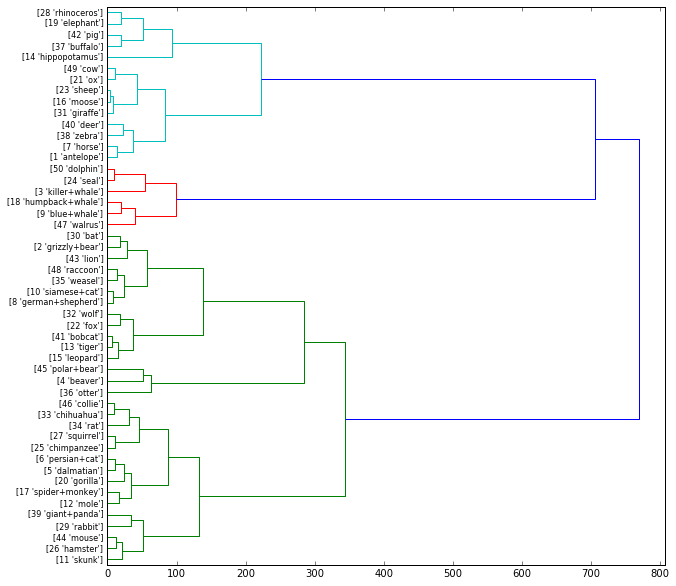

In [8]:
pca_linked = linkage(pca_transform, 'ward')
rcParams[u'figure.figsize'] = [10, 10]
dendrogram(pca_linked, orientation='right', labels=classes)
plt.title('Clustering Dendrogram with 10 Clusters', fontsize=14)
plt.xlabel('Cluster Distance', fontsize=12)
plt.ylabel('Class', fontsize=14)


# 5 

In [13]:
from struct import unpack
import numpy as np
import matplotlib.pylab as plt 

def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

def displaychar(image):
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.axis('off')
    #plt.show()

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


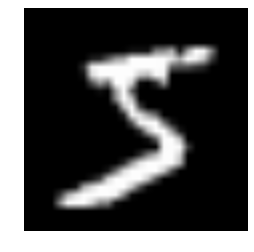

In [15]:
train_img, train_lbl = loadmnist('train-images-idx3-ubyte', 'train-labels-idx1-ubyte')
test_img, test_lbl = loadmnist('t10k-images-idx3-ubyte', 't10k-labels-idx1-ubyte')
%pylab inline
displaychar(train_img[0])

In [16]:
df1 = pd.DataFrame(train_img)
df1.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
df2 = pd.DataFrame(cov)
df2.head()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
#Get the covariance of the training images
cov = np.cov(np.transpose(train_img))

# Get the corresponding eigenvalues for the training images
eigen_values = np.linalg.eigvals(cov)

#Sum the eigen values for the denimotor of the equation F(K)
denominator = np.sum(eigen_values)

#Get the numberator for the equation F(K)
numerator = np.sum(eigen_values[5:])

In [ ]:
#use the np.linald.eigh which will give you ascending order so you ened to reorder
#is the dimension that it is reduced down to

In [23]:
def F(k):
    numerator = np.sum(eigen_values[k:])
    return numerator/denominator

In [37]:
k_list=[200, 150, 100, 50, 25]
for i in k_list:
    print "For k=%d"%i, F(i), "%"

For k=200 0.0335526522989 %
For k=150 0.0516435811854 %
For k=100 0.0853714275605 %
For k=50 0.175353136667 %
For k=25 0.3081950912 %


In [40]:
_, eigen_vectors = np.linalg.eig(cov)
_, eigen_vectors

(array([  3.32724667e+05,   2.43283939e+05,   2.11507367e+05,
          1.84776386e+05,   1.66926831e+05,   1.47844962e+05,
          1.12178203e+05,   9.88744296e+04,   9.46962491e+04,
          8.08098245e+04,   7.23136203e+04,   6.93583013e+04,
          5.88268711e+04,   5.80140840e+04,   5.41237569e+04,
          5.08430685e+04,   4.54126063e+04,   4.37784591e+04,
          4.07053405e+04,   3.95197904e+04,   3.65535359e+04,
          3.45151939e+04,   3.26932861e+04,   3.12865858e+04,
          3.02875526e+04,   2.87760784e+04,   2.78592854e+04,
          2.69605814e+04,   2.55331936e+04,   2.36861230e+04,
          2.25627619e+04,   2.22217664e+04,   2.06606718e+04,
          2.01109854e+04,   1.95432009e+04,   1.86382921e+04,
          1.73409003e+04,   1.67262448e+04,   1.65058174e+04,
          1.61916632e+04,   1.56595799e+04,   1.52512141e+04,
          1.43483288e+04,   1.36528231e+04,   1.31988643e+04,
          1.28604293e+04,   1.24114828e+04,   1.20543160e+04,
        

In [9]:

_, eigen_vectors = np.linalg.eig(cov)

def image_PCA(k, image_id):    
    #Take 1000 images to PCA is fast
    image = train_img[:1000]
    U = eigen_vectors[:,:k+1]
    UUT = np.dot(U,U.T)
    image = image.T
    X = np.dot(UUT,image).T[image_id]
    X = X.reshape(28,28)

    #plot 
    plt.imshow(X, cmap=plt.cm.gray) 
    plt.title('%i' % k, fontsize = 20)
    plt.axis('off')

NameError: name 'cov' is not defined

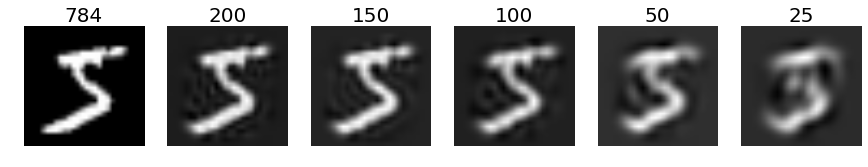

In [42]:
k_list = [784, 200, 150, 100, 50, 25]
index = 0
plt.figure(figsize=(15,5))
for k in k_list:
    index += 1
    plt.subplot(1, len(k_list), index)
    image_PCA(k,0)